In [1]:
# #encoding salary column
# #df['salary']=df['salary'].replace('<=50K',0)
# df['salary']=df['salary'].replace('>50K',1)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(rc={"figure.figsize":(11,8)})
pd.pandas.set_option("display.max_columns",None)

In [3]:
df = pd.read_csv("adult.csv")

In [4]:
data = df.copy()

## data cleaning

In [5]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
data.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
st.mode(data["workclass"])

'Private'

In [8]:
st.mode(data["occupation"])

'Prof-specialty'

In [9]:
st.mode(data["native.country"])

'United-States'

In [10]:
data["native.country"] = data["native.country"].str.replace("?","United-States")

In [11]:
# check the mode value of colum " ?" and replace with mode value 
data["workclass"] = data["workclass"].str.replace("?","Private")

In [12]:
# check the mode value of colum "?" and replace with mode value
data["occupation"] = data["occupation"].str.replace("?","Prof-specialty")

In [13]:
data["income"].unique()

array(['<=50K', '>50K'], dtype=object)

In [14]:
# encoding salary column "<=50K","0"
data["income"] = data["income"].replace("<=50K","0")

In [15]:
# encoding salary column ">50K","1"
data["income"] = data["income"].replace(">50K","1")

In [16]:
data["income"] = pd.to_numeric(data["income"])

In [17]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [18]:
# no null value in data
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [19]:
len(data[data.duplicated()])

24

In [20]:
# drop all duplicat values from data
data = data.drop_duplicates(keep="first")

In [21]:
data.shape

(32537, 15)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education.num   32537 non-null  int64 
 5   marital.status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital.gain    32537 non-null  int64 
 11  capital.loss    32537 non-null  int64 
 12  hours.per.week  32537 non-null  int64 
 13  native.country  32537 non-null  object
 14  income          32537 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 4.0+ MB


## EDA

In [23]:
catigorical_features = data.dtypes[data.dtypes == "object"].index

In [24]:
catigorical_features

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')

In [25]:
numerical_features = data.dtypes[data.dtypes != "object"].index

In [26]:
numerical_features

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income'],
      dtype='object')

In [27]:
data["sex"].value_counts(normalize=True)*100

Male      66.92381
Female    33.07619
Name: sex, dtype: float64

In [28]:
for i in catigorical_features:
    print(i,data[i].value_counts(normalize=True)*100)
    print("=================================================")

workclass Private             75.326551
Self-emp-not-inc     7.806497
Local-gov            6.432677
State-gov            3.989304
Self-emp-inc         3.429941
Federal-gov          2.950487
Without-pay          0.043028
Never-worked         0.021514
Name: workclass, dtype: float64
education HS-grad         32.252513
Some-college    22.380674
Bachelors       16.452039
Masters          5.292436
Assoc-voc        4.247472
11th             3.611273
Assoc-acdm       3.279344
10th             2.867505
7th-8th          1.982359
Prof-school      1.770292
9th              1.579740
12th             1.330793
Doctorate        1.269324
5th-6th          1.020377
1st-4th          0.510188
Preschool        0.153671
Name: education, dtype: float64
marital.status Married-civ-spouse       46.009159
Never-married            32.784215
Divorced                 13.649076
Separated                 3.150260
Widowed                   3.051910
Married-spouse-absent     1.284691
Married-AF-spouse         0.070689


<AxesSubplot:title={'center':'Male and Female Count'}, xlabel='sex', ylabel='count'>

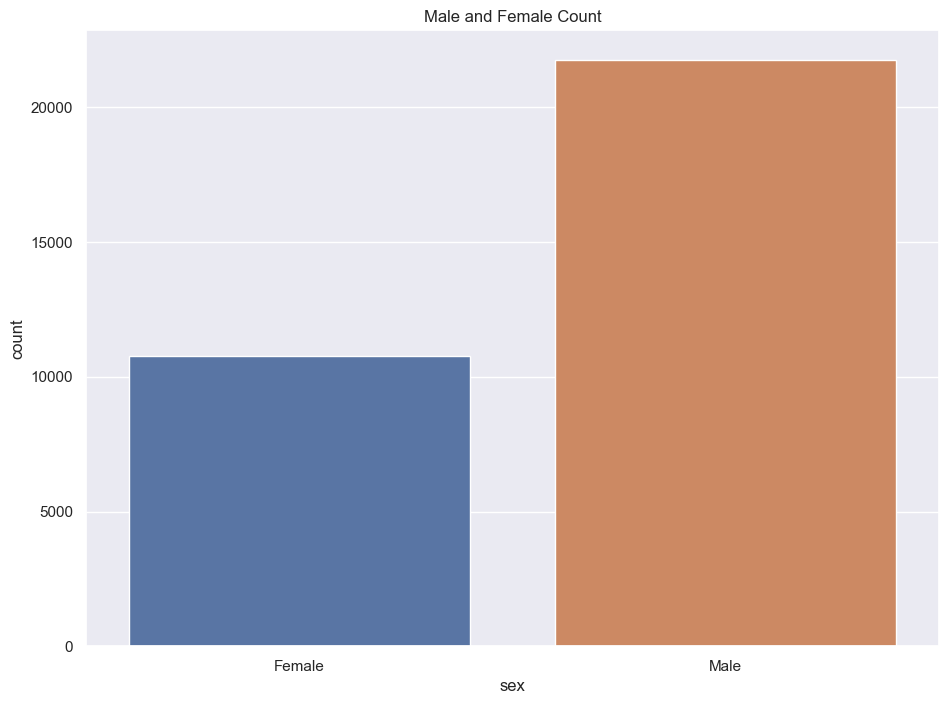

In [29]:
plt.title("Male and Female Count")
sns.countplot(data["sex"])

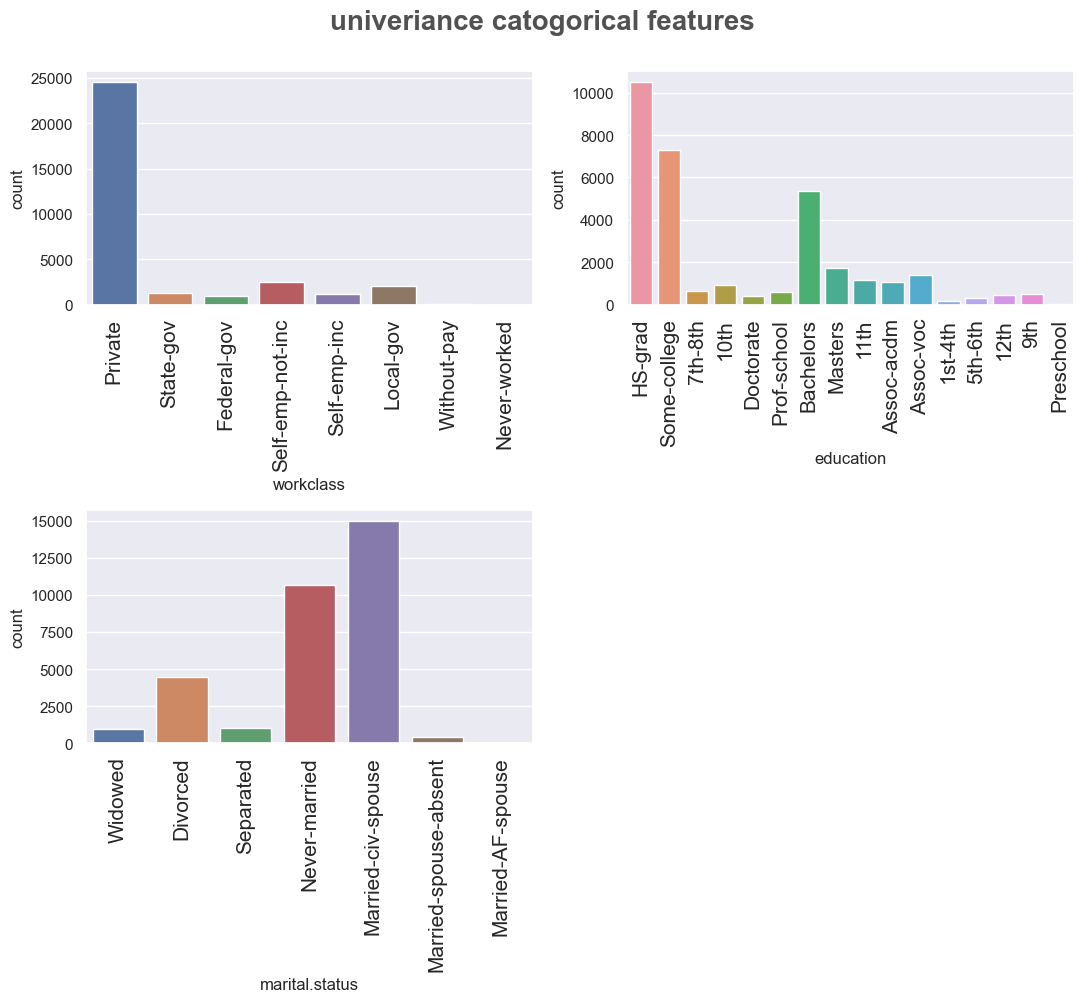

In [30]:
cato = ['workclass', 'education', 'marital.status']
plt.suptitle("univeriance catogorical features",fontsize=20,fontweight="bold",alpha=0.8,y=1)
for i in range(0,len(cato)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=data[cato[i]])
    plt.tight_layout()
    plt.xticks(size=15,rotation=90)
    

<AxesSubplot:ylabel='race'>

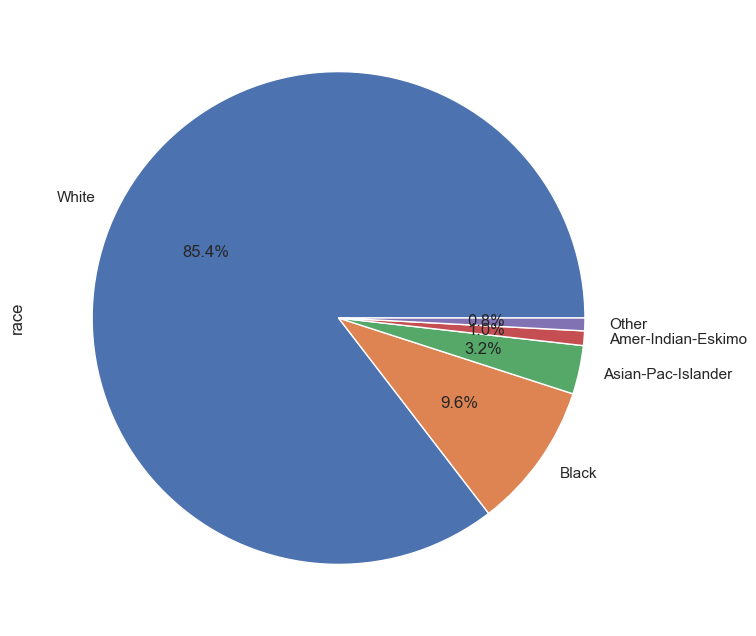

In [31]:
data["race"].value_counts().plot.pie(autopct="%1.1f%%")

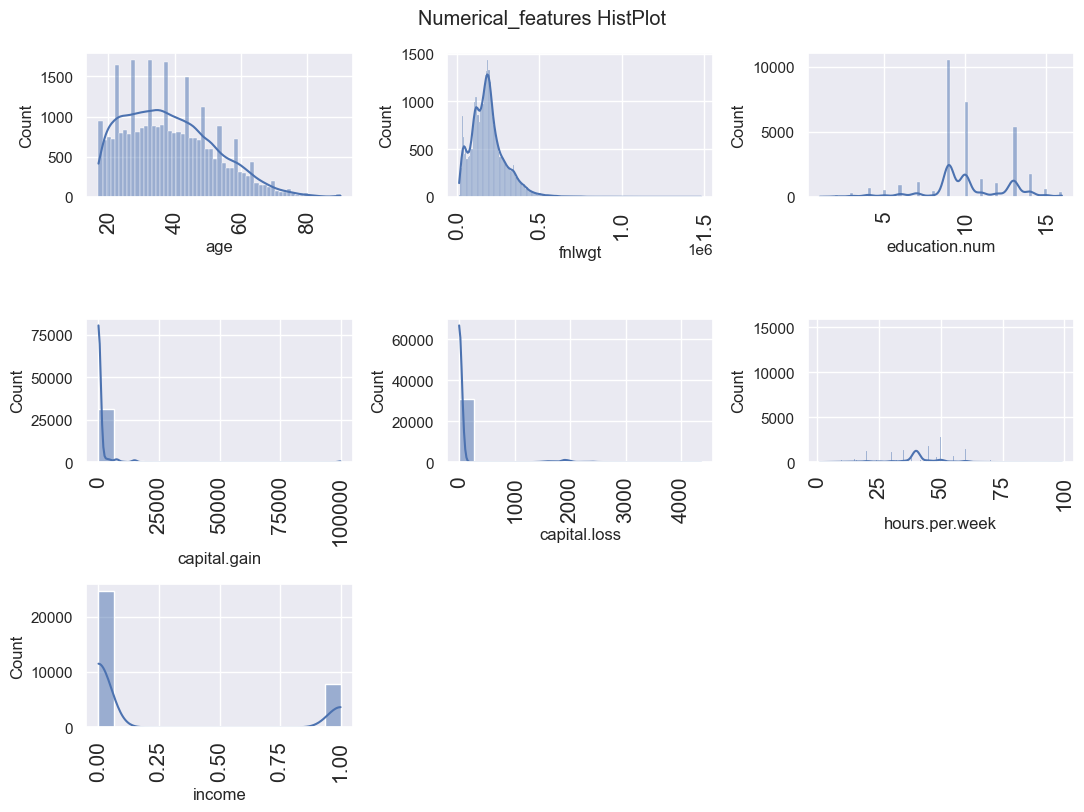

In [32]:
plt.suptitle("Numerical_features HistPlot")
for i in range(0,len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.histplot(x=data[numerical_features[i]],kde=True)
    plt.tight_layout()
    plt.xticks(size=15,rotation=90)

<AxesSubplot:ylabel='education.num'>

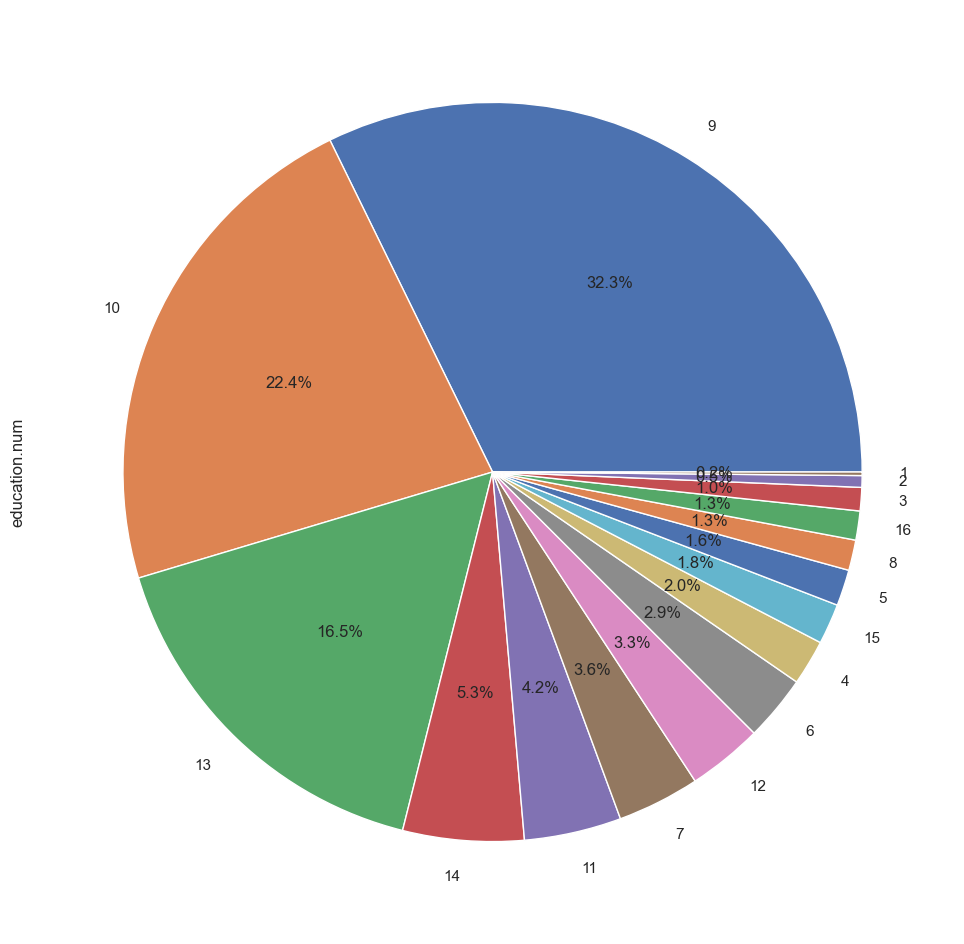

In [33]:
plt.figure(figsize=(12,12))
data["education.num"].value_counts().plot.pie(autopct="%1.1f%%")

In [34]:
income_distribution = data.groupby("workclass")["income"].sum().sort_values(ascending=False).reset_index()

In [35]:
income_distribution

,workclass,income
0,Private,5152
1,Self-emp-not-inc,724
2,Self-emp-inc,622
3,Local-gov,617
4,Federal-gov,371
5,State-gov,353
6,Never-worked,0
7,Without-pay,0


<AxesSubplot:title={'center':'income_distribution'}, xlabel='income', ylabel='workclass'>

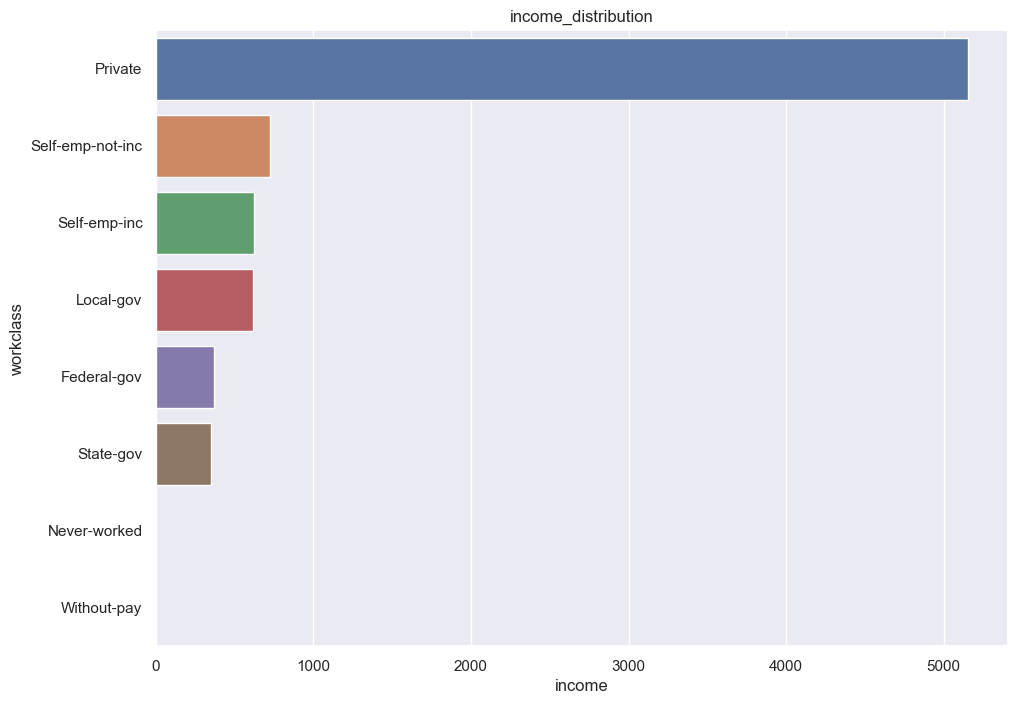

In [36]:
plt.title("income_distribution")
sns.barplot(x="income",y="workclass",data=income_distribution)

<AxesSubplot:xlabel='income'>

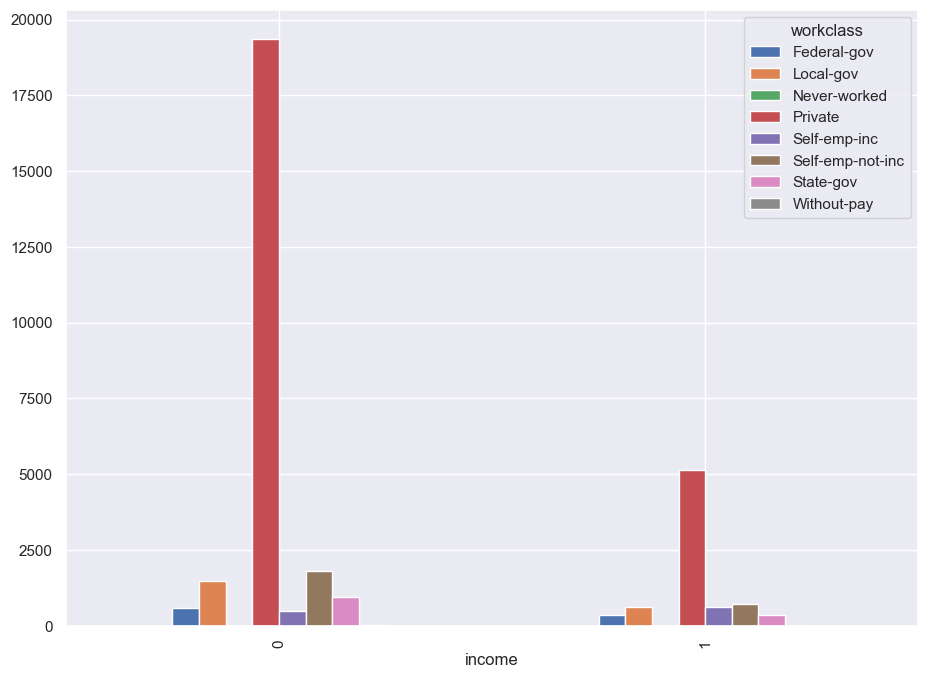

In [37]:
#cheacking distribution of people in workclass according to salary
class_salary = pd.crosstab(data['income'],data['workclass'])
class_salary.plot(kind='bar')

<AxesSubplot:xlabel='income'>

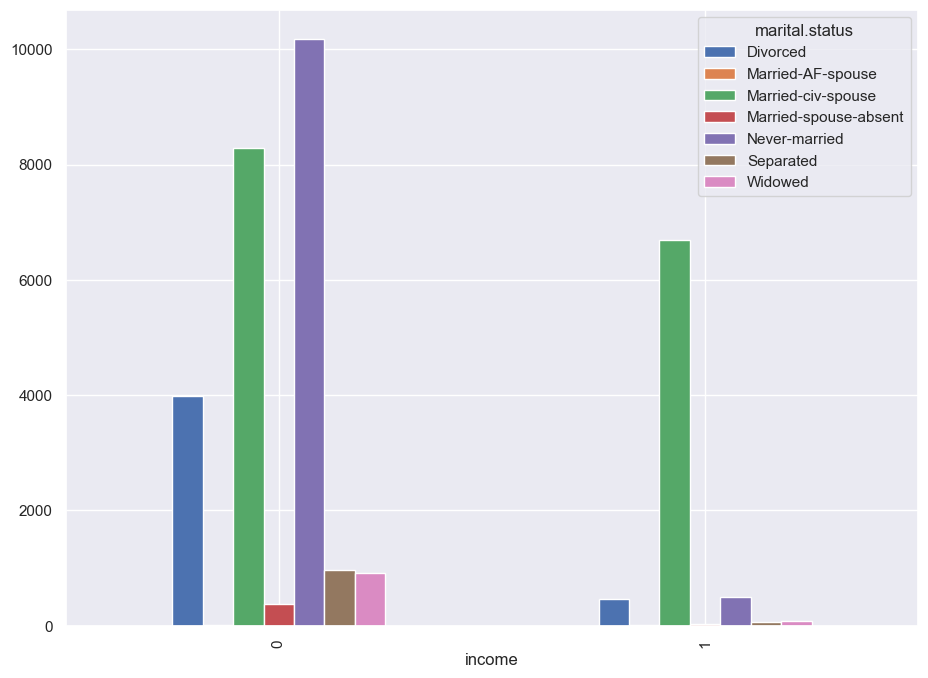

In [38]:
# maried people and there selary distribution
class_salary = pd.crosstab(data['income'],data['marital.status'])
class_salary.plot(kind='bar')

<AxesSubplot:xlabel='income'>

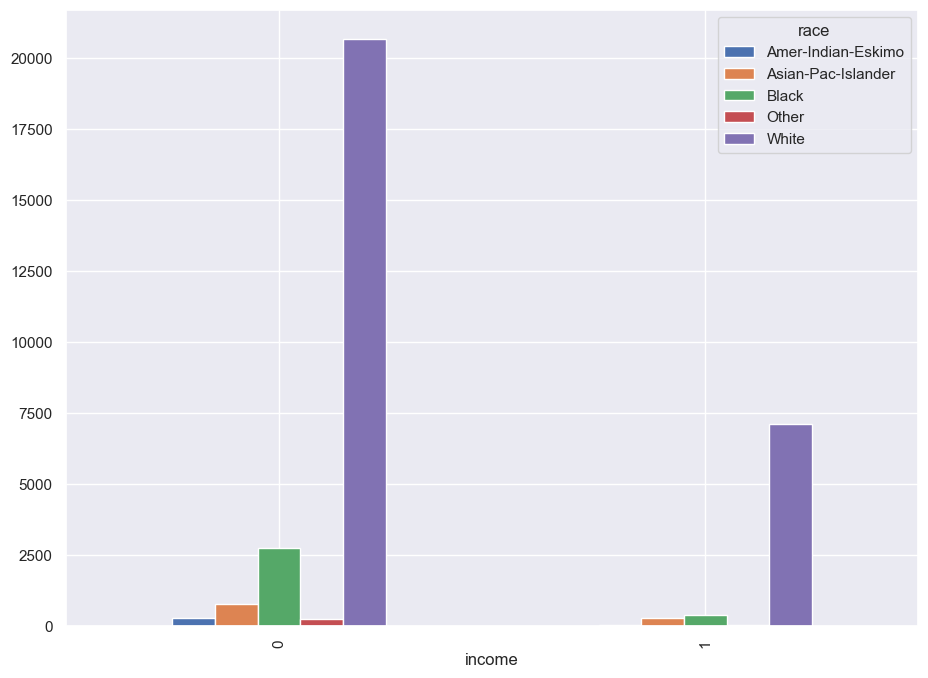

In [39]:
# distribution of salary base on race
class_salary = pd.crosstab(data['income'],data['race'])
class_salary.plot(kind='bar')

Text(0.5, 1.0, 'occupation and there salary distribition')

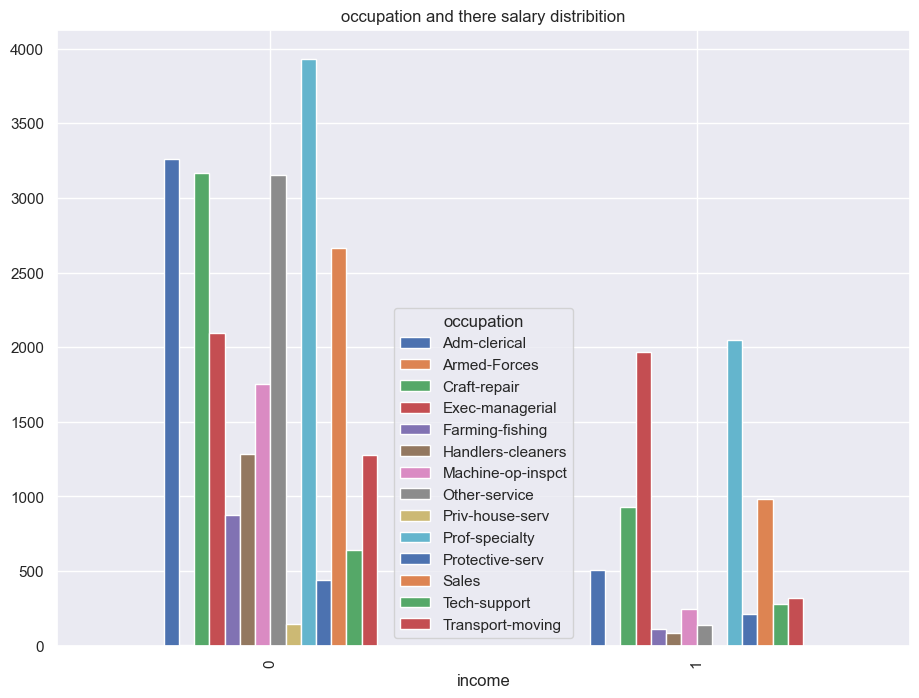

In [40]:
class_salary = pd.crosstab(data['income'],data['occupation'])
class_salary.plot(kind='bar')
plt.title("occupation and there salary distribition")

In [41]:
data.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515,0.234037
fnlwgt,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898,-0.009502
education.num,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422,0.335272
capital.gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408,0.223336
capital.loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229,0.150501
hours.per.week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000,0.229658
income,0.234037,-0.009502,0.335272,0.223336,0.150501,0.229658,1.000000


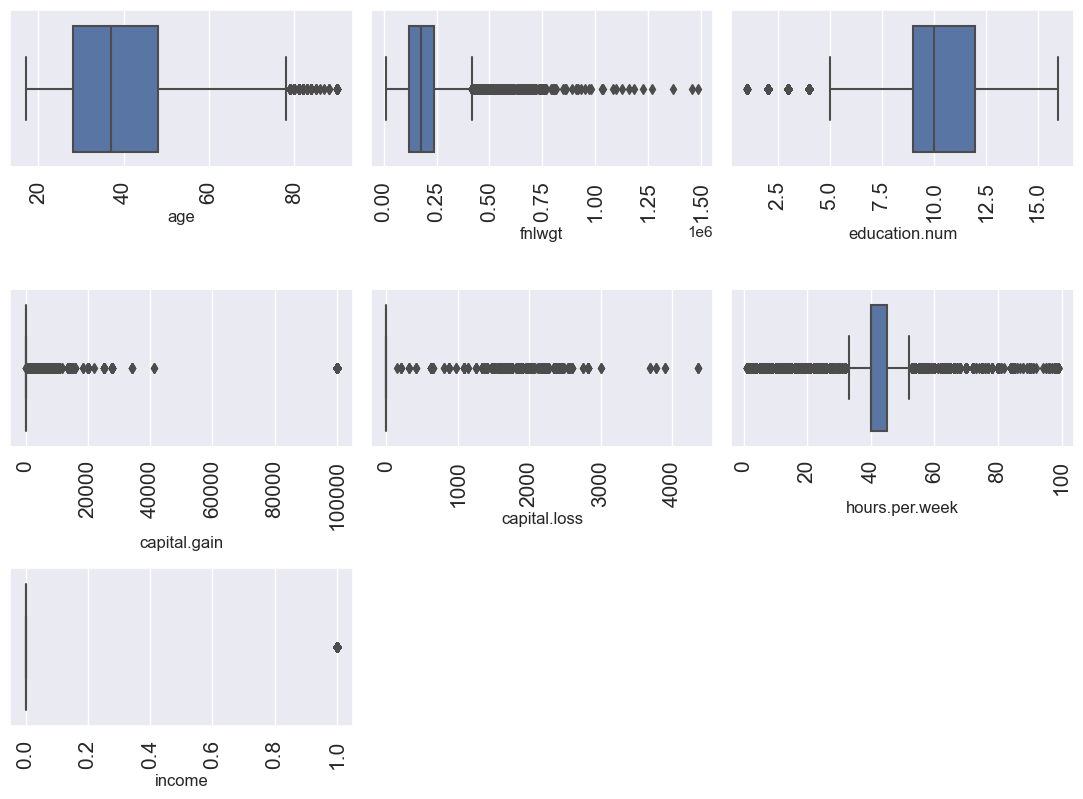

In [42]:
for i in range(0,len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=data[numerical_features[i]])
    plt.tight_layout()
    plt.xticks(size=15,rotation=90)

In [43]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [44]:
cap_gain = data.groupby("occupation")["capital.gain"].sum().sort_values(ascending=False).reset_index()

In [45]:
cap_gain

,occupation,capital.gain
0,Prof-specialty,12402613
1,Exec-managerial,9200435
2,Sales,4817377
3,Craft-repair,2662353
4,Adm-clerical,1869750
5,Transport-moving,783047
6,Machine-op-inspct,658036
7,Other-service,630339
8,Tech-support,625057
9,Farming-fishing,586188


<AxesSubplot:title={'center':'occupation capital gain'}, xlabel='capital.gain', ylabel='occupation'>

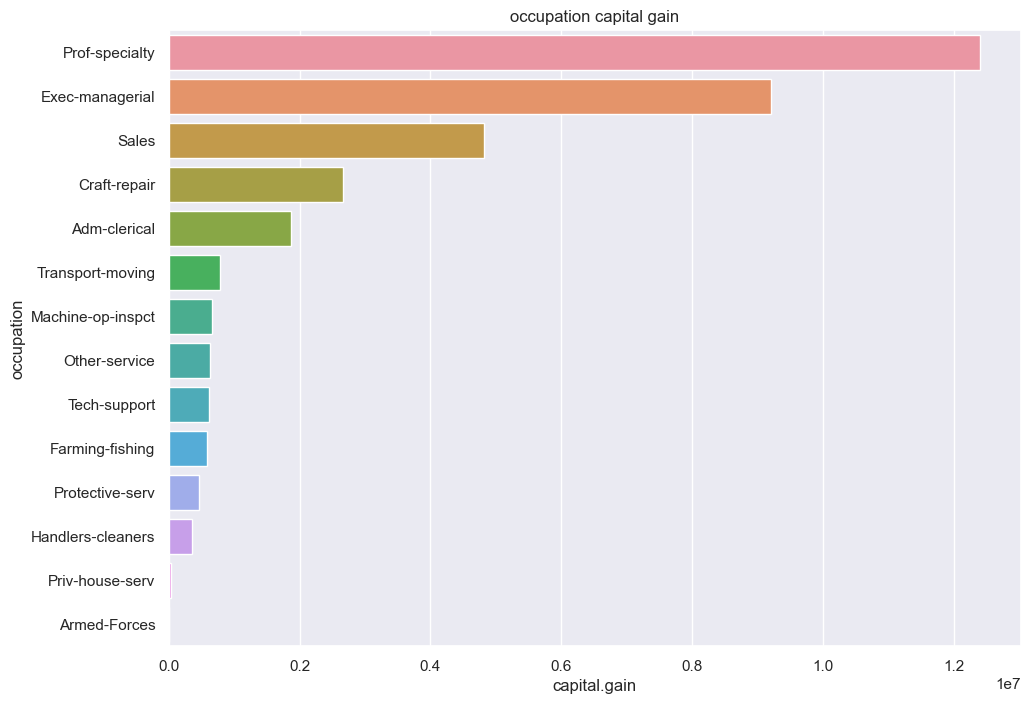

In [46]:
plt.title("occupation capital gain")
sns.barplot(x="capital.gain",y="occupation",data=cap_gain)

In [47]:
loss_gain = data.groupby("occupation")["capital.loss"].sum().sort_values(ascending=False).reset_index()

In [48]:
loss_gain

,occupation,capital.loss
0,Prof-specialty,675173
1,Exec-managerial,564517
2,Craft-repair,362619
3,Sales,358797
4,Adm-clerical,229195
5,Transport-moving,130125
6,Other-service,126036
7,Machine-op-inspct,123536
8,Tech-support,91562
9,Farming-fishing,62697


<AxesSubplot:title={'center':'occupation capital loss'}, xlabel='capital.loss', ylabel='occupation'>

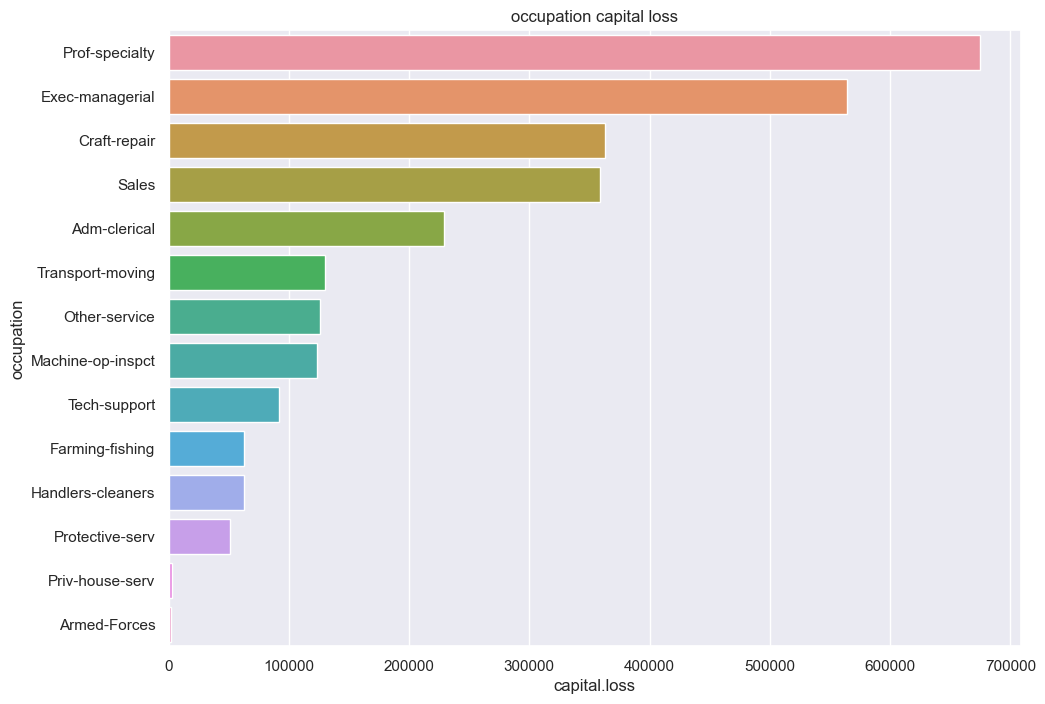

In [49]:
plt.title("occupation capital loss")
sns.barplot(x="capital.loss",y="occupation",data=loss_gain)

<AxesSubplot:title={'center':'Age and The Workclass'}, xlabel='workclass', ylabel='age'>

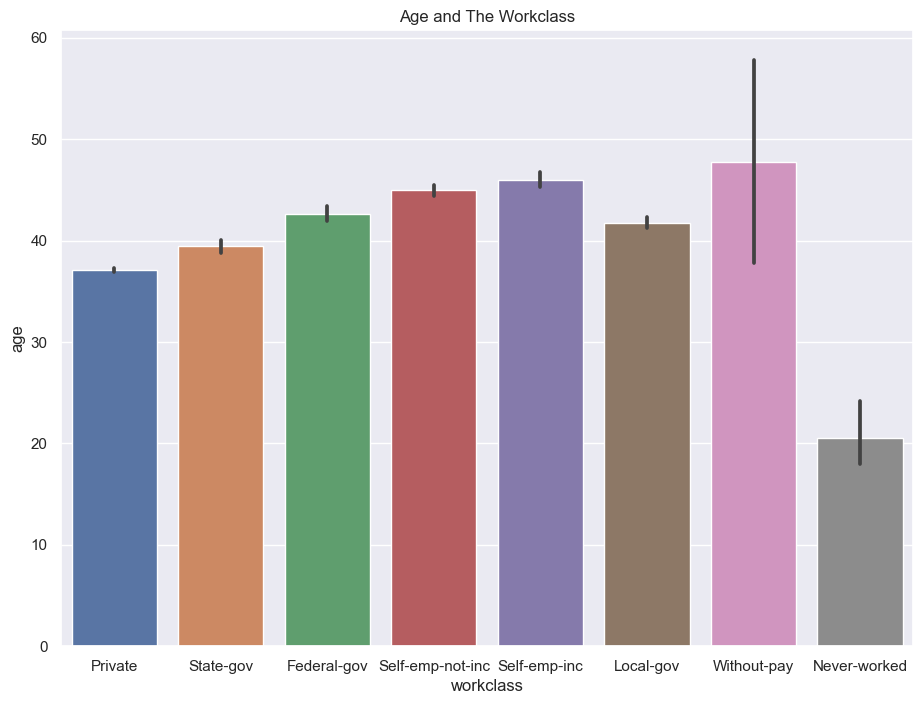

In [50]:
plt.title("Age and The Workclass")
sns.barplot(x="workclass",y="age",data=data)

<AxesSubplot:title={'center':'Age and The marital status'}, xlabel='marital.status', ylabel='age'>

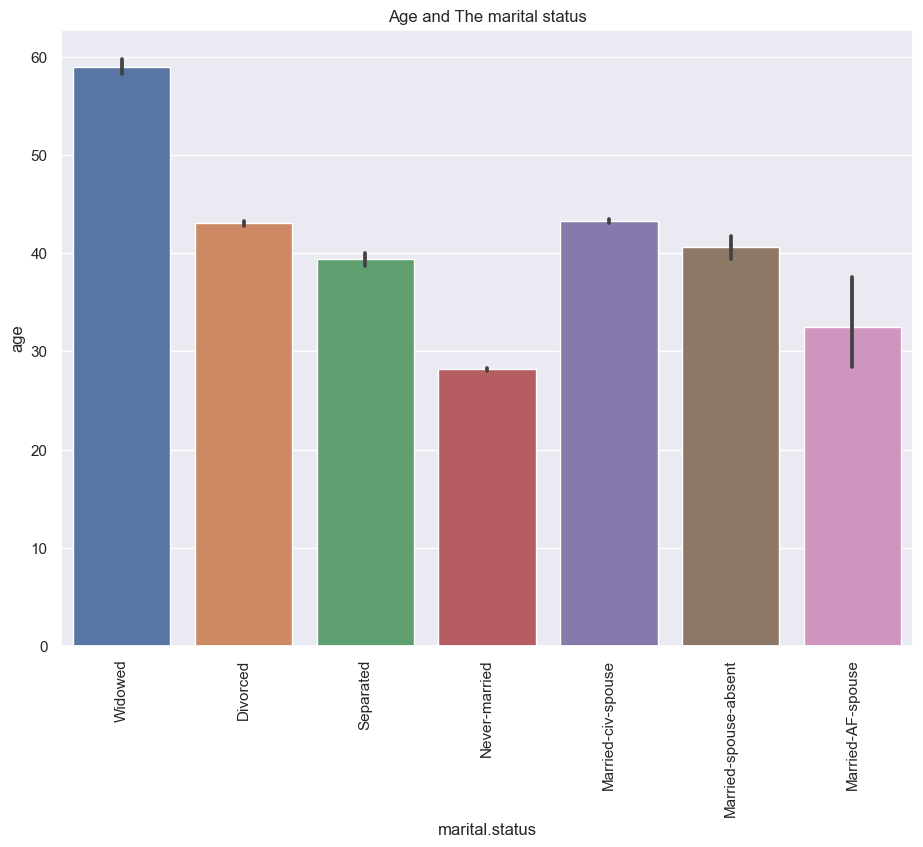

In [51]:
plt.xticks(rotation = 90)
plt.title("Age and The marital status")
sns.barplot(x="marital.status",y="age",data=data)

In [57]:
race = data.groupby(["education","race"])["income"].sum().sort_values(ascending=False).reset_index().head(15)

In [58]:
race

,education,race,income
0,Bachelors,White,2015
1,HS-grad,White,1541
2,Some-college,White,1254
3,Masters,White,871
4,Prof-school,White,382
5,Assoc-voc,White,333
6,Doctorate,White,276
7,Assoc-acdm,White,235
8,Bachelors,Asian-Pac-Islander,97
9,Bachelors,Black,96


<AxesSubplot:title={'center':'eduction and income'}, xlabel='education', ylabel='income'>

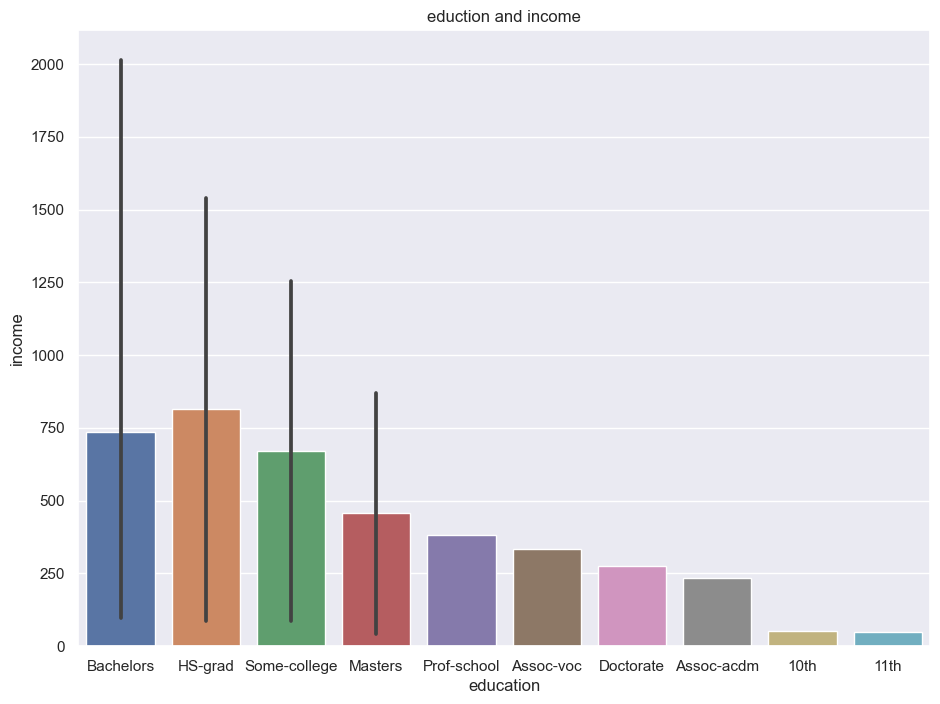

In [61]:
plt.title("eduction and income")
sns.barplot(x="education",y="income",data=race)

<AxesSubplot:title={'center':'race and there income'}, xlabel='race', ylabel='income'>

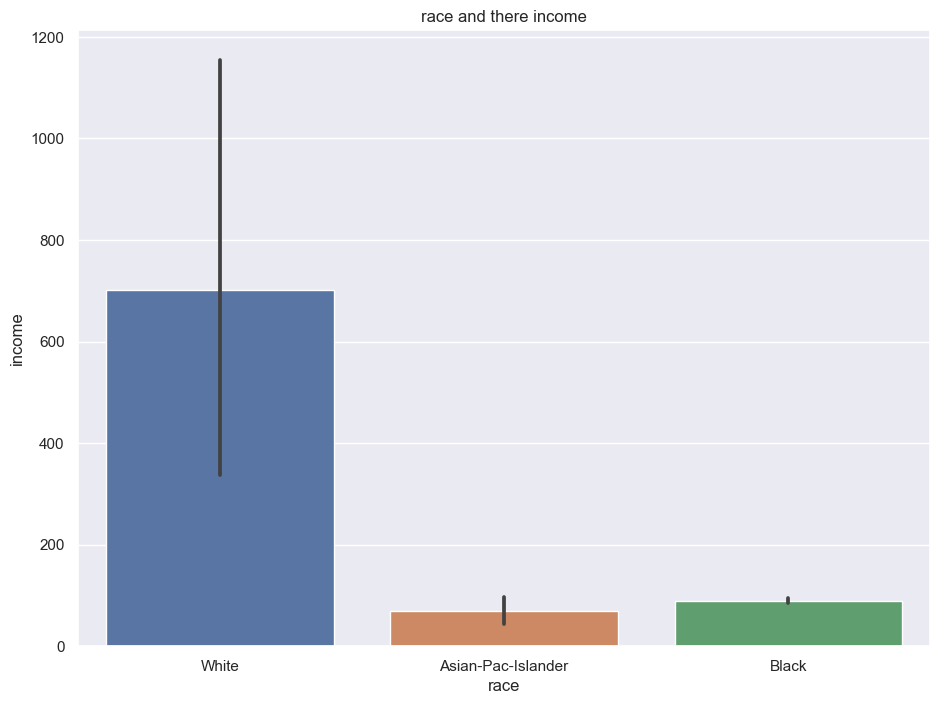

In [62]:
plt.title("race and there income")
sns.barplot(x="race",y="income",data=race)

<AxesSubplot:title={'center':' marital status and there income'}, xlabel='marital.status', ylabel='income'>

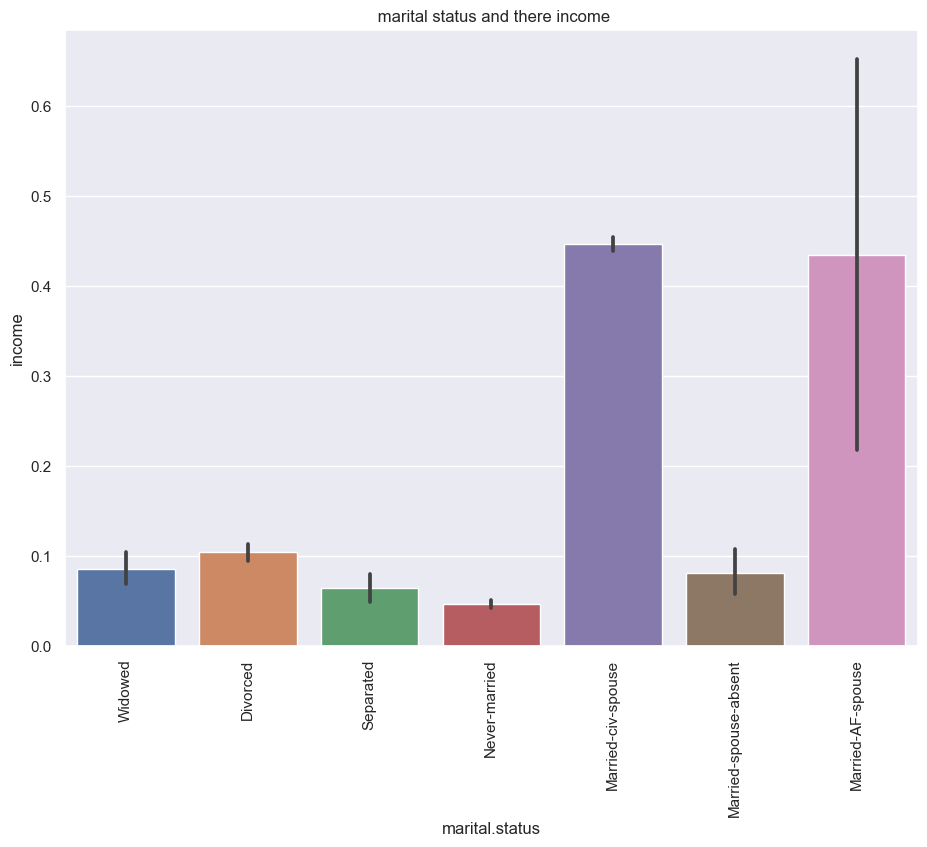

In [64]:
plt.xticks(rotation = 90)
plt.title(" marital status and there income")
sns.barplot(x="marital.status",y="income",data=data)

In [65]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


<AxesSubplot:ylabel='age'>

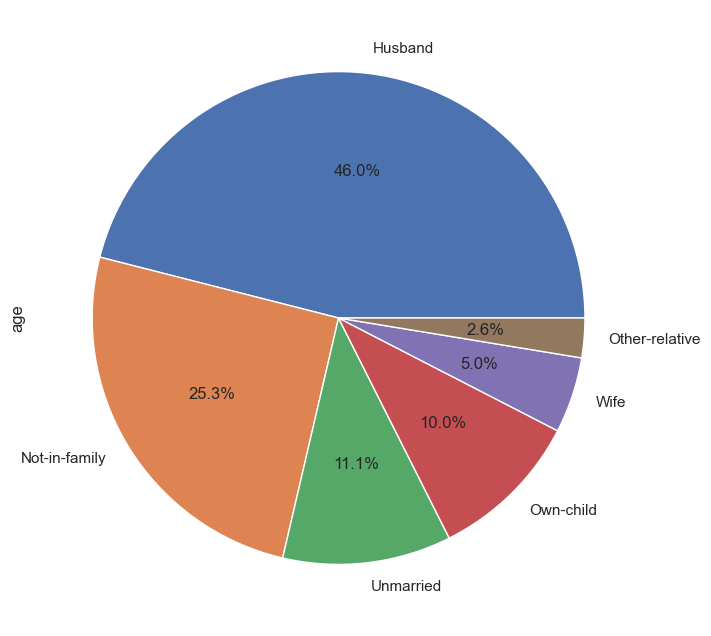

In [70]:
data.groupby("relationship")["age"].sum().sort_values(ascending=False).plot.pie(autopct="%1.1f%%")